## Support Vector Machines

#### Training a Linear Classifier

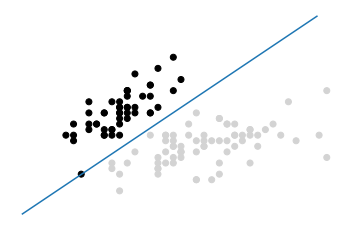

array([0])

In [674]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# load data
iris = load_iris()
features = iris.data[:120, :2]
target = iris.target[:120]

# standardize data
features_standardized = StandardScaler().fit_transform(features)

# create SVC
svc= LinearSVC(C=1.0).fit(features_standardized, target)

# # Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

# create new observation
new_observation = [[ -2, 3]]

# Predict class of new observation
svc.predict(new_observation)

#### Handling Linearly Inseparable Classes Using Kernels

c:\users\emuli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


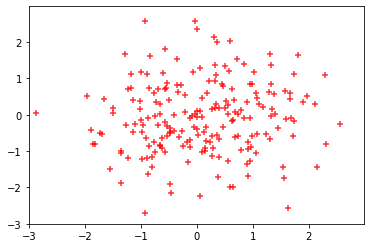

In [681]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# set seed
np.random.seed(420)

# Generate two features
features = np.random.randn(200,2)

# generate xor gate fro linearly inseperable classes
target_xor = np.logical_xor(features[:,0] > 0, 
                            features[:,1]> 0 )
target = np.where(target_xor, 0, 1)

# create svc
svc = SVC(kernel ='rbf', random_state = 420, gamma =1, C=1)
svc.fit(features, target)

# plot the SVM
def plot_decision_regions(features, target, classifier):
    cmap = ListedColormap('red', 'blue')
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02),
                          np.arange(-3,3,0.02))
    Z = classifier.predict(np.array([xx1.ravel(),
                                    xx2.ravel()]).T)
    Z= Z.reshape(xx1.shape)
    plt.contour(xx1,xx2, Z, alpha = 0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(target)):
        plt.scatter(x=features[target ==cl, 0],
                    y=features[target ==cl, 1],
                   alpha =0.8, c=cmap(idx),
                   marker='+', label = cl)
        
plot_decision_regions(features, target, classifier = svc)
plt.show()

#### Creating Predicted Probabilities

In [687]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# load data 
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# create svc
svc = SVC(kernel = 'linear', probability =True, random_state =0)
svc.fit(features, target)

# predict 
new_observation = [[.4 ,.4,.4 ,.4]]
svc.predict(new_observation)
svc.predict_proba(new_observation)

# to generate the model probability, we must set it true

array([[0.94509124, 0.04574674, 0.00916202]])

#### Identifying Support Vectors

In [689]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# load data 
iris = load_iris()
features = iris.data
target =iris.target

# standardize features
features_standardized = StandardScaler().fit_transform(features)

# create svc
svc =SVC(kernel='linear', random_state =0)
svc.fit(features_standardized, target)

# view support vectors
svc.support_vectors_
svc.support_

array([ 23,  41,  52,  54,  56,  57,  66,  68,  70,  72,  76,  77,  78,
        83,  84,  87,  98, 106, 110, 119, 123, 126, 127, 129, 133, 134,
       137, 138, 149])

#### Handling Imbalanced Classes 

In [691]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# load dataset imbalanced
iris = load_iris()
features = iris.data [40:100,:]
target = iris.target [40:100]

# create target vector
target = np.where((target == 0),0,1)

# scale features
features_standardized = StandardScaler().fit_transform(features)

# create svc
svc = SVC(kernel = 'linear', class_weight = 'balanced', C =1, 
         random_state =0)
svc.fit(features_standardized, target)


SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)